In [1]:
import os
import pandas as pd
from nltk.stem.snowball import FrenchStemmer
stemmer = FrenchStemmer()

from constant import *

In [ ]:
!python3 -m spacy download fr_core_news_md

In [2]:
def read_file(filename):
  with open(filename, 'r') as file:
    data = file.read().rstrip()
  # split recipes
  recipes = data.split('**')
  # split ingredients
  recipes = [recipe.split('##') for recipe in recipes]
  # remove newlines
  recipes = [[x.strip('\n') for x in recipe] for recipe in recipes]
  return recipes

In [7]:
'grande cuil.' in '1 grande cuil. sel'

True

In [8]:
'1 grande cuil. sel'.split('grande cuil.')

['1 ', ' sel']

In [3]:
def process_ingredients(ingredients):
  result = []
  ingredients = ingredients.split('\n')
  for l in ingredients:
    tri = l.split(' ')
    unit = '-'
    try:
      quantity = int(tri[0])
      tri.pop(tri.index(tri[0]))
    except ValueError:
      try:
        quantity = float(tri[0])
        tri.pop(tri.index(tri[0]))
      except ValueError:
        quantity = '-'
    if tri[0] in Units:
      unit = tri[0]
      tri.pop(tri.index(tri[0]))
      
    # other than quantity and unit, the rest is the ingredient
    ingredient = ' '.join(tri)
    # de lait -> lait
    if ingredient.startswith('de'):
      ingredient = ingredient.split(' ')[1]
    # fromage or vin
    if ingredient.startswith('fromage') or ingredient.startswith('vin'):
      ingredient = ingredient.split(' ')[0]
    # porc
    if ingredient.endswith('porc'):
      ingredient = 'porc'
    # get stem of ingredient
    # ingredient = stemmer.stem(ingredient)
    # doc = nlp(ingredient)
    # ingredient = ' '.join([token.lemma_ for token in doc])
    result.append((quantity, unit, ingredient))
  return result
  

In [23]:
data_dir = '../res/recipes/'
recipes_lst = []
for filename in os.listdir(data_dir):
  recipes_lst += read_file(data_dir+filename)
recipes_df = pd.DataFrame(recipes_lst, columns = ['region', 'recipe_name', 'with ingredients or not',
                  'number of people', 'ingredients', 'recipe_body'])
recipes_df.head()

,region,recipe_name,with ingredients or not,number of people,ingredients,recipe_body
0,Alsace,LE KUGELHOPF,with,6,0.5 litre de lait\n500 g farine\n250 g beurre\...,Pour 6 personnes : Mettez dans une terrine 1/2...
1,Alsace,LE SCHWOWCBREDEL,with,6,500 g farine\n500 g sucre\n500 g amandes\n500 ...,Pour 6 personnes: Mélanger farine et beurre. R...
2,Alsace,PARFAIT DE FOIE GRAS STRASBOURGEOISE,with,-,1 kg foie gras\n1 truffe\n1 dl gelée\n100 g be...,"1 kg de foie gras d’Alsace 1er qualité, dénerv..."
3,Alsace,TRUITES DE LA FECHT COLMARIENNE,with,4,4 truites\n8 écrevisses\n4 œufs\n50 g oignons\...,Pour 4 personnes: Prenez 4 belles truites du t...
4,Alsace,LES SCHANKELAS,with,-,375 g sucre\n250 g amandes\n200 g beurre\n250 ...,Ecraser le beurre avec la farine et bien mêler...


In [24]:
recipes_df['processed'] = recipes_df['ingredients'].apply(lambda x: process_ingredients(x))
recipes_df

,region,recipe_name,with ingredients or not,number of people,ingredients,recipe_body,processed
0,Alsace,LE KUGELHOPF,with,6,0.5 litre de lait\n500 g farine\n250 g beurre\...,Pour 6 personnes : Mettez dans une terrine 1/2...,"[(0.5, litre, lait), (500, g, farine), (250, g..."
1,Alsace,LE SCHWOWCBREDEL,with,6,500 g farine\n500 g sucre\n500 g amandes\n500 ...,Pour 6 personnes: Mélanger farine et beurre. R...,"[(500, g, farine), (500, g, sucre), (500, g, a..."
2,Alsace,PARFAIT DE FOIE GRAS STRASBOURGEOISE,with,-,1 kg foie gras\n1 truffe\n1 dl gelée\n100 g be...,"1 kg de foie gras d’Alsace 1er qualité, dénerv...","[(1, kg, foie gras), (1, -, truffe), (1, dl, g..."
3,Alsace,TRUITES DE LA FECHT COLMARIENNE,with,4,4 truites\n8 écrevisses\n4 œufs\n50 g oignons\...,Pour 4 personnes: Prenez 4 belles truites du t...,"[(4, -, truites), (8, -, écrevisses), (4, -, œ..."
4,Alsace,LES SCHANKELAS,with,-,375 g sucre\n250 g amandes\n200 g beurre\n250 ...,Ecraser le beurre avec la farine et bien mêler...,"[(375, g, sucre), (250, g, amandes), (200, g, ..."
...,...,...,...,...,...,...,...
335,Lyon,"FEUILLETE AUX ORONGES ET AUX ECREVISSES, MARTELIN",without,6,écrevisse\nvin blanc\nlégumes\nvelouté de vola...,Pour 6 personnes : Faire sauter et cardinalise...,"[(-, -, écrevisse), (-, -, vin), (-, -, légume..."
336,Lyon,GRAS-DOUBLE SAUTE LYONNAISE,with,6,1 kg gras-double\n2 gros oignons\n6 cl huile\n...,Pour 6 personnes : Emincer le gras-double en g...,"[(1, kg, gras-double), (2, -, gros oignons), (..."
337,Lyon,LA GALETTE LYONNAISE,with,4-5,10 pommes de terre\n150 g beurre\n3 oignons\ns...,Pour 4 ou 5 personnes : Préparer une purée de ...,"[(10, -, pommes de terre), (150, g, beurre), (..."
338,Lyon,LE SALADIER LYONNAIS,with,4,1 pied mouton\n1 foie volaille\n3 œufs\n2 hare...,Pour 4 personnes : Faire une vinaigrette bien ...,"[(1, -, pied mouton), (1, -, foie volaille), (..."


In [25]:
for index, row in recipes_df.iterrows():
    print('------------start------------')
    print(row['recipe_body'])
    print('------------ingredients------------')
    print(row['ingredients'])
    for ingredient in row['processed']:
      print(ingredient)
    print('------------end------------')

------------start------------
Pour 6 personnes : Mettez dans une terrine 1/2 litre de lait tiède où vous
aurez délayé 500 g de farine. Faites-y fondre 1/4 de beurre et travaillez
bien le tout.

Prenez 25 g de levure de pain délayée dans un peu de lait tiède.

Ajoutez le tout à la pâte.

Battez 2 œufs entiers en omelette, et ajoutez-y de gros raisins de Malaga
trempés dans du kirsch, 1/2 quart de sucre, un peu de sel. Amalgamez
le tout et battez du plat de la main jusqu’à ce que la pâte s’en détache.
Mettez-la dans une forme à côtes ( qu’on trouve partout en Alsace ). Laissez
monter jusqu’à deux doigts du bord.

Passez au four. Environ 1 heure de cuisson.

Pour embellir ce gâteau, on colle dans le fond quelques amandes qui
croquent délicieusement sous la dent.
------------ingredients------------
0.5 litre de lait
500 g farine
250 g beurre
2 œufs
125 g raisins Malaga
6 cl kirsch
125 g sucre
25 g levure de boulanger
1 pincée de sel
quelques amandes
(0.5, 'litre', 'lait')
(500, 'g', 'farin

In [ ]:
# cooccurance of ingredients in a receipe region

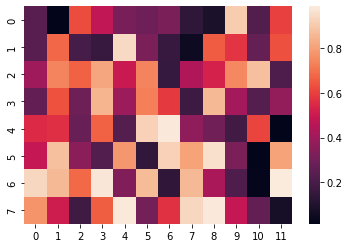

In [23]:
import seaborn as sns
import numpy as np
sample_data = np.random.rand(8, 12)  
ax = sns.heatmap(sample_data)  

In [25]:
sample_data.shape

(8, 12)

In [51]:
Alsace = recipes_df.groupby('region').get_group('Alsace')
Alsace

,region,recipe_name,with ingredients or not,number of people,ingredients,recipe_body,processed
0,Alsace,LE KUGELHOPF,with,6,0.5 litre de lait\n500 g farine\n250 g beurre\...,Pour 6 personnes : Mettez dans une terrine 1/2...,"[(0.5, litre, lait), (500, g, farin), (250, g,..."
1,Alsace,LE SCHWOWCBREDEL,with,6,500 g farine\n500 g sucre\n500 g amandes\n500 ...,Pour 6 personnes: Mélanger farine et beurre. R...,"[(500, g, farin), (500, g, sucr), (500, g, ama..."
2,Alsace,PARFAIT DE FOIE GRAS STRASBOURGEOISE,with,-,1 kg foie gras\n1 truffe\n1 dl gelée\n100 g be...,"1 kg de foie gras d’Alsace 1er qualité, dénerv...","[(1, kg, foie gr), (1, -, truff), (1, dl, gel)..."
3,Alsace,TRUITES DE LA FECHT COLMARIENNE,with,4,4 truites\n8 écrevisses\n4 œufs\n50 g oignons\...,Pour 4 personnes: Prenez 4 belles truites du t...,"[(4, -, truit), (8, -, écrev), (4, -, œuf), (5..."
4,Alsace,LES SCHANKELAS,with,-,375 g sucre\n250 g amandes\n200 g beurre\n250 ...,Ecraser le beurre avec la farine et bien mêler...,"[(375, g, sucr), (250, g, amand), (200, g, beu..."
5,Alsace,NOUILLES A L’ALSACIENNE,with,4,250 g farine\n80 g beurre\nchapelure,Pour 4 personnes : Prendre une demi-livre de n...,"[(250, g, farin), (80, g, beurr), (-, -, chape..."
6,Alsace,KNEPFI,with,4,500 g farine\n3 œufs\n14 litre lait\n100 g beu...,Pour 4 personnes : Préparer une pâte avec une ...,"[(500, g, farin), (3, -, œuf), (14, litre, lai..."
7,Alsace,LA BONNE RECETTE DE LA VRAIE CHOUCROUTE,with,3,500 g choucroute\n1 oignon\n2 cuil. graisse d'...,Pour 3 personnes: Dans une marmite bien étamée...,"[(500, g, choucrout), (1, -, oignon), (2, cuil..."
8,Alsace,LA TARTE ALSACIENNE,with,6,200 g farine\n80 g beurre\n100 g sucre\n125 g ...,Pour 6 personnes : Garnir une tourtière de pât...,"[(200, g, farin), (80, g, beurr), (100, g, suc..."


In [59]:
Alsace_ingredients = []
for index, row in Alsace.iterrows():
    recipe_inredients = []
    for tup in row['processed']:
        recipe_inredients.append(tup[2])
    Alsace_ingredients.append(recipe_inredients)
# sns.heatmap(Alsace_ingredients)

In [63]:
[l.sort() for l in Alsace_ingredients]
Alsace_ingredients

[['beurr',
  'farin',
  'kirsch',
  'lait',
  'levure de boulang',
  'quelques amand',
  'raisins malag',
  'sel',
  'sucr',
  'œuf'],
 ['amand',
  'beurr',
  'cannelle en poudr',
  "eau fleur d'orang",
  'farin',
  'sucr',
  'écorce orange confit',
  'œuf'],
 ['beurr', 'foie gr', 'gel', 'truff'],
 ['carott',
  'lauri',
  'légum',
  'oignon',
  'persil',
  'poivr',
  'thym',
  'truit',
  'vin blanc',
  'écrev',
  'œuf'],
 ['amand',
  'beurr',
  'citron',
  'farin',
  "fleur d'orang",
  'sucr',
  'vanill',
  'œuf'],
 ['beurr', 'chapelur', 'farin'],
 ['beurr', 'farin', 'fromage râp', 'lait', 'sauce tomat', 'œuf'],
 ['bouillon',
  'choucrout',
  'côtes de porc',
  'grains genievr',
  "graisse d'oi",
  'kirsch',
  'lard de poitrin',
  'oignon',
  'pomm',
  'pommes de terr',
  'sauc',
  'vin blanc'],
 ['beurr', 'crème fraîch', 'farin', 'pomm', 'sucr']]

In [69]:
Alsace_ingredients = []
for index, row in Alsace.iterrows():
    for ingredient in row['processed']:
        Alsace_ingredients.append(ingredient[2])
# sns.heatmap(Alsace_ingredients)

In [70]:
pd.value_counts(np.array(Alsace_ingredients))

beurr                   7
farin                   6
œuf                     5
sucr                    4
lait                    2
kirsch                  2
vin blanc               2
amand                   2
oignon                  2
pomm                    2
sauce tomat             1
vanill                  1
fleur d'orang           1
chapelur                1
fromage râp             1
grains genievr          1
choucrout               1
graisse d'oi            1
légum                   1
bouillon                1
lard de poitrin         1
pommes de terr          1
côtes de porc           1
sauc                    1
citron                  1
carott                  1
poivr                   1
eau fleur d'orang       1
raisins malag           1
levure de boulang       1
sel                     1
quelques amand          1
écorce orange confit    1
cannelle en poudr       1
foie gr                 1
persil                  1
truff                   1
gel                     1
truit       